# The Battle of Neighborhoods (Week 2)

### IBM Data Science Certification Capstone Project

# Introduction
Los Angeles (LA) is the largest city in California. LA has a population of approximately four (4) million people and ranks third in having the largest population in North America. There are many characteristics that define LA including the city having ethnic diversity, a large metropolis and a wide-ranging economy. As such it has one of the largest Gross Domestic Product (GDP) in the world that has reached 1 trillion USD. 

Development of any business within LA will require an in-depth analysis of several factors. This report however looks specifically into the restaurant business and how data analysis can point to several key indicators in determining specifics of the business which can suggest a possible location and a recommended type of cuisine to maximize profit. The following are the queries that the report will answer to determine these:

* Determining neighborhood clusters according to the most popular type of restaurants cuisine e.g. Italian, Chinese. 
* Determining current rating of the different types of restaurant cuisine
* Analyze the tips for a restaurant cuisine to determine popularity
* Determining current trending types of restaurants cuisine

These queries will have the effect of showing the relationship between a location and a preferred cuisine as LA is ethnically diverse as mentioned before. In addition, even changes to colloquial preferences as per current trends in demand for certain foods can be shown by the queries. 

Business personnel making the decisions can get an idea how the accumulated data points to via a simplified map showing the clusters. The use of graphs will also give insight into which location and cuisine can be most profitable based on indicators of restaurant ratings, trending and tips analysis for restaurants. These will then be compiled into a final conclusion that can surmise the best location and cuisine a business owner starting a restaurant in LA can choose. 
A businessperson’s interest in knowing this data will be due to him/her making an informed decision such that they gain the most amount of profit from their initial investment. By knowing the analysis of the existing data, they reduce the risk of a loss since location and cuisine of a restaurant are key decision factors that can determine how popular a restaurant is and the amount of revenue that can be drawn.

# Methodology
The methodology will be implemented in five parts:
* Obtaining, Validating and Cleaning the Data
* Data Analysis of Cleaned Dataframe
* K-means Clustering Analysis
* Foursquare API Ratings and Tips Analysis
* Determining Trending Venues

## Obtaining, Validating and Cleaning the Data
A pandas dataframe was created to store the data obtained from the “SOCR Data - Los Angeles City Neighborhoods Data” data source. In order to validate if the dataframe had good data the co-ordinates of Los Angeles were obtained utilizing the ‘Nominatim’ function. A map of Los Angeles was then created, and the neighborhoods co-ordinates superimposed on the map via blue circle markers using ‘folium’.

### Importing all required Libraries
The required libraries will be imported into the notebook for data analysis and visulization.

In [5]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [37]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

The 'neighborhoods' dataframe is created to store the neighborhoods of the largest median incomes

In [38]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [39]:
neighborhoods.Neighborhood = ['Bel-Air','Beverly_Crest','Pacific_Palisades','Porter_Ranch','Brentwood','Cheviot_Hills','Hollywood_Hills_West','Beverlywood','West_Hills','Century_City','Playa_del_Rey','Woodland_Hills','West_Los_Angeles','Hancock_Park','Chatsworth','Granada_Hills','Shadow_Hills','Encino','Rancho_Park']
neighborhoods.Latitude = [34.096148,34.112107,34.07586,34.278482,34.052,34.04061,34.107708,34.04161,34.046013,34.054,33.95924,34.168481,34.062969,34.072863,34.258,34.291746,34.2575,34.153717,34.04543]
neighborhoods.Longitude = [-118.416, -118.448009, -118.605726, -118.272689, -118.334603, -118.602, -118.505173, -118.35503, -118.49251,-118.42069,-118.463558,-118.424713, -118.395011, -118.473, -118.416, -118.408511, -118.367911, -118.54461, -118.560484]
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Bel-Air,34.096148,-118.416000
1,Beverly_Crest,34.112107,-118.448009
2,Pacific_Palisades,34.075860,-118.605726
3,Porter_Ranch,34.278482,-118.272689
4,Brentwood,34.052000,-118.334603


### Define Foursquare Credentials and Version

In [8]:
CLIENT_ID = 'XYZTZ3OOZ0453ZORBNUVT1ZDJS4P35IGEWKYXVU3VUVJSXL5' # Anderson Balraj Foursquare ID
CLIENT_SECRET = 'OAAKSRYZ5ZMXLWGYZ0ZLBYKFRNEMOQKRUQXZZXNDIPVOI1JO' # Anderson Balraj  Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: XYZTZ3OOZ0453ZORBNUVT1ZDJS4P35IGEWKYXVU3VUVJSXL5
CLIENT_SECRET:OAAKSRYZ5ZMXLWGYZ0ZLBYKFRNEMOQKRUQXZZXNDIPVOI1JO


Using 'Nominatim' module to convert the Los Angeles address to latitude and longitude co-ordinates

In [40]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

34.0536909 -118.2427666


In [10]:
# create map of Los Angeles using latitude and longitude values with the neighborhoods superimposed

map_LA = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
   
map_LA

This shows that the data within the dataframe is valid as it maps well

In [41]:
LIMIT = 200

This is the venue function was then created to make the “GET” request that generates the JSON file. This function has the ability to read the created dataframe mentioned previously to generate the URL and then obtain the JSON. The function then extracts certain data from the JSON inclusive of Venue, Venue Co-ordinates and Venue Category and builds a new dataframe containing this information. 

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The following retrieves the given data from the JSON and places into a dataframe LA_Venues

In [43]:
LA_Venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'])

Bel-Air
Beverly_Crest
Pacific_Palisades
Porter_Ranch
Brentwood
Cheviot_Hills
Hollywood_Hills_West
Beverlywood
West_Hills
Century_City
Playa_del_Rey
Woodland_Hills
West_Los_Angeles
Hancock_Park
Chatsworth
Granada_Hills
Shadow_Hills
Encino
Rancho_Park


In [44]:
print(LA_Venues.shape)
LA_Venues.head()

(495, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bel-Air,34.096148,-118.416000,Franklin Canyon Park,34.096533,-118.412046,Park
1,Bel-Air,34.096148,-118.416000,Coldwater Canyon Park,34.091264,-118.411829,Park
2,Bel-Air,34.096148,-118.416000,Secure Live Scan,34.098159,-118.410645,Health Food Store
3,Bel-Air,34.096148,-118.416000,Coldwater Canyon Park Soft Track,34.089688,-118.412130,Trail
4,Beverly_Crest,34.112107,-118.448009,The Real Towing Services Company Since 1985,34.111911,-118.444805,Business Service


In [15]:
LA_Venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bel-Air,5,5,5,5,5,5
Beverly_Crest,3,3,3,3,3,3
Beverlywood,43,43,43,43,43,43
Brentwood,61,61,61,61,61,61
Century_City,84,84,84,84,84,84
Chatsworth,6,6,6,6,6,6
Cheviot_Hills,6,6,6,6,6,6
Encino,2,2,2,2,2,2
Granada_Hills,23,23,23,23,23,23


In [45]:
print('There are {} uniques categories.'.format(len(LA_Venues['Venue Category'].unique())))

There are 153 uniques categories.


The one hot encoding technique was applied to then applied in the ‘Venue Category’ column in order to create a new data frame where the previous ‘Venue Category’ strings are now the column names which were then grouped.

In [46]:
# one hot encoding
LA_onehot = pd.get_dummies(LA_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['Neighborhood'] = LA_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Women's Store,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Temple,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped

,Neighborhood,Women's Store,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Temple,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Wings Joint
0,Bel-Air,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000,0.000000
1,Beverly_Crest,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
2,Beverlywood,0.000000,0.00000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025,0.025000
3,Brentwood,0.000000,0.00000,0.000000,0.016393,0.016393,0.016393,0.032787,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,0.016393,0.000,0.016393
4,Century_City,0.011494,0.00000,0.000000,0.000000,0.011494,0.000000,0.011494,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.000,0.000000
5,Chatsworth,0.000000,0.00000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
6,Cheviot_Hills,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
7,Encino,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
8,Granada_Hills,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
9,Hancock_Park,0.000000,0.00000,0.000000,0.000000,0.040816,0.000000,0.102041,0.102041,0.020408,...,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000


In [48]:
LA_grouped.shape

(18, 153)

Utilizing ‘regex’ a filter was then applied to get only the ‘Restaurant’ data required for the analysis. The final ‘cleaned’ dataframe that will be used for the analysis consist of the ‘Neighborhood’ column which we can utilize to query in the ‘Neighborhood co-ordinates’ dataset to obtain the respective locations and then the ‘Restaurant Categories’ columns which indicate the frequency of visits to the respective Neighborhoods. 

In [49]:
LA_grouped.rename(columns={'Neighborhood':'Neighborhood Restaurant'}, inplace=True) #Used to keep the Neighborhoods column

In [50]:
LA_grouped_R = LA_grouped.filter(regex='Restaurant')

In [51]:
LA_grouped_R 

,Neighborhood Restaurant,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,...,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Bel-Air,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,Beverly_Crest,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,Beverlywood,0.075000,0.000000,0.025,0.025000,0.000000,0.00,0.050000,0.00,0.00,...,0.025000,0.000000,0.025000,0.000000,0.025000,0.000000,0.000000,0.00000,0.000000,0.000000
3,Brentwood,0.016393,0.000000,0.000,0.016393,0.032787,0.00,0.000000,0.00,0.00,...,0.032787,0.000000,0.049180,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.016393
4,Century_City,0.011494,0.011494,0.000,0.000000,0.022989,0.00,0.011494,0.00,0.00,...,0.000000,0.000000,0.057471,0.000000,0.011494,0.000000,0.011494,0.00000,0.000000,0.000000
5,Chatsworth,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.142857,0.000000
6,Cheviot_Hills,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,Encino,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,Granada_Hills,0.000000,0.086957,0.000,0.000000,0.000000,0.00,0.086957,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.00000,0.000000,0.000000
9,Hancock_Park,0.040816,0.000000,0.000,0.000000,0.000000,0.00,0.020408,0.00,0.00,...,0.000000,0.000000,0.000000,0.020408,0.040816,0.000000,0.000000,0.00000,0.000000,0.000000


In [52]:
LA_grouped_R.rename(columns={'Neighborhood Restaurant':'Neighborhood'}, inplace=True) #Rename back the neighborhood column

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [53]:
LA_grouped_R # Cleaned dataframe

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,...,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Bel-Air,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,Beverly_Crest,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,Beverlywood,0.075000,0.000000,0.025,0.025000,0.000000,0.00,0.050000,0.00,0.00,...,0.025000,0.000000,0.025000,0.000000,0.025000,0.000000,0.000000,0.00000,0.000000,0.000000
3,Brentwood,0.016393,0.000000,0.000,0.016393,0.032787,0.00,0.000000,0.00,0.00,...,0.032787,0.000000,0.049180,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.016393
4,Century_City,0.011494,0.011494,0.000,0.000000,0.022989,0.00,0.011494,0.00,0.00,...,0.000000,0.000000,0.057471,0.000000,0.011494,0.000000,0.011494,0.00000,0.000000,0.000000
5,Chatsworth,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.142857,0.000000
6,Cheviot_Hills,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,Encino,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,Granada_Hills,0.000000,0.086957,0.000,0.000000,0.000000,0.00,0.086957,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.00000,0.000000,0.000000
9,Hancock_Park,0.040816,0.000000,0.000,0.000000,0.000000,0.00,0.020408,0.00,0.00,...,0.000000,0.000000,0.000000,0.020408,0.040816,0.000000,0.000000,0.00000,0.000000,0.000000


### Data Analysis of Cleaned Dataframe
The cleaned dataframe is now ready to be used using data analysis methodologies. The first exploratory analysis is looking at the top 5 restaurants per neighborhood according to the frequencies in the cleaned dataframe. This is to get an initial idea of how the data will look like before further processing. Each neighborhood has the respective restaurants sorted from the largest frequencies using the ‘sort_values’ function and then printing the top 5 for each neighborhood. 

In [54]:
num_top_venues = 5

for hood in LA_grouped_R['Neighborhood']:
    print("----"+hood+"----")
    temp = LA_grouped_R[LA_grouped_R['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bel-Air----
                             venue  freq
0              American Restaurant   0.0
1                Kosher Restaurant   0.0
2                  Thai Restaurant   0.0
3                 Sushi Restaurant   0.0
4  Southern / Soul Food Restaurant   0.0


----Beverly_Crest----
                             venue  freq
0              American Restaurant   0.0
1                Kosher Restaurant   0.0
2                  Thai Restaurant   0.0
3                 Sushi Restaurant   0.0
4  Southern / Soul Food Restaurant   0.0


----Beverlywood----
                       venue  freq
0        American Restaurant  0.08
1       Fast Food Restaurant  0.05
2  Latin American Restaurant  0.02
3  Cajun / Creole Restaurant  0.02
4       Caribbean Restaurant  0.02


----Brentwood----
                       venue  freq
0         Mexican Restaurant  0.05
1  Latin American Restaurant  0.03
2         Chinese Restaurant  0.03
3        American Restaurant  0.02
4          Kosher Restaurant  0.02


----

The data is looking valid thus far therefore the next step is to obtain a more substantial dataframe utilizing similar methods in the exploratory analysis. A function ‘return_most_common_venues’ was created to determine the most common restaurants and basically sort the venues for each neighborhood via frequency. The data range created expands to the top 10 restaurants/cuisines in contrast to the initial analysis and utilizing the sorting function a new dataframe is created. The dataframe consists of the ‘Neighborhood’ column and then columns illustrating a ranking of 1 to 10 of the most common restaurants as per the respective neighborhood.

In [55]:
def return_most_common_venues(row, num_top_venues): #Creating a function to sort most frequent visited restaurants
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10 #Creating dataframe post data exploratory analysis

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
LA_grouped_PC= pd.DataFrame(columns=columns)
LA_grouped_PC['Neighborhood'] = LA_grouped_R['Neighborhood']

for ind in np.arange(LA_grouped_R.shape[0]):
    LA_grouped_PC.iloc[ind, 1:] = return_most_common_venues(LA_grouped_R.iloc[ind, :], num_top_venues)

LA_grouped_PC.head()

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Bel-Air,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
1,Beverly_Crest,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
2,Beverlywood,American Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Restaurant,Mexican Restaurant,Latin American Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant
3,Brentwood,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Kosher Restaurant,Korean Restaurant,American Restaurant,New American Restaurant,Mediterranean Restaurant
4,Century_City,Mexican Restaurant,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,American Restaurant,Restaurant,Southern / Soul Food Restaurant


### K-means Clustering Analysis
Another part of data analysis undertaken is the K-means clustering utilizing the dataframe from before. The reason this analysis is undertaken is to determine which neighborhoods are similar type in terms of cuisine preference based on each top ten restaurants/cuisines. A standard cluster of 5 is chosen to give appropriate variety. 
The ‘KMeans’ function is utilized in order to generate ‘cluster labels’ for each row of the dataframe based on the clustering analysis the function performed. Once this is completed three major data aspects are merged into one dataframe which include the Neighborhoods and co-ordinates, the cluster labels and finally the top ten most common restaurants/cuisines per neighborhood. 

In [57]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

LA_grouped_clustering = LA_grouped_R.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 0, 4, 2, 0, 0, 3, 4], dtype=int32)

In [58]:
# add clustering labels
LA_grouped_PC.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_merged = neighborhoods

# merge LA_grouped with neigborhoods_data to add latitude/longitude for each neighborhood
neighborhoods_merged = neighborhoods_merged.join(LA_grouped_PC.set_index('Neighborhood'), on='Neighborhood')


neighborhoods_merged_N = neighborhoods_merged[neighborhoods_merged['Cluster Labels'].notna()]
neighborhoods_merged_N['Cluster Labels'] = neighborhoods_merged_N['Cluster Labels'].astype(np.int64)
neighborhoods_merged_N.head() 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Bel-Air,34.096148,-118.416000,0,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
1,Beverly_Crest,34.112107,-118.448009,0,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
2,Pacific_Palisades,34.075860,-118.605726,0,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
4,Brentwood,34.052000,-118.334603,0,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Kosher Restaurant,Korean Restaurant,American Restaurant,New American Restaurant,Mediterranean Restaurant
5,Cheviot_Hills,34.040610,-118.602000,0,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant


The clusters were then placed on the map of Los Angeles to illustrate which neighborhoods are similar in terms of preference in cuisine. The function was setup in such a way each cluster will generate a different color on the map using ‘folium’. The results of the clustering for each of the five clusters was broken out from the dataframe to show the neighborhoods that was grouped together in a cluster utilizing the ‘cluster label’ as a grouping index.

In [31]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged_N['Latitude'],neighborhoods_merged_N['Longitude'], neighborhoods_merged_N['Neighborhood'], neighborhoods_merged_N['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The data within each cluster is obtained in the following section for Clusters 1 to 5

#### CLUSTER 1

In [59]:
neighborhoods_merged_N.loc[neighborhoods_merged_N['Cluster Labels'] == 0, neighborhoods_merged_N.columns[[0] + list(range(4, neighborhoods_merged_N.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Bel-Air,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
1,Beverly_Crest,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
2,Pacific_Palisades,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
4,Brentwood,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Kosher Restaurant,Korean Restaurant,American Restaurant,New American Restaurant,Mediterranean Restaurant
5,Cheviot_Hills,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
6,Hollywood_Hills_West,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
10,Playa_del_Rey,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
16,Shadow_Hills,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
17,Encino,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
18,Rancho_Park,Vegetarian / Vegan Restaurant,New American Restaurant,Fast Food Restaurant,Japanese Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Restaurant,French Restaurant,Asian Restaurant


#### CLUSTER 2

In [60]:
neighborhoods_merged_N.loc[neighborhoods_merged_N['Cluster Labels'] == 1, neighborhoods_merged_N.columns[[0] + list(range(4, neighborhoods_merged_N.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
11,Woodland_Hills,Asian Restaurant,Chinese Restaurant,Mexican Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Falafel Restaurant,Fast Food Restaurant


#### CLUSTER 3

In [61]:
neighborhoods_merged_N.loc[neighborhoods_merged_N['Cluster Labels'] == 2, neighborhoods_merged_N.columns[[0] + list(range(4, neighborhoods_merged_N.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
14,Chatsworth,Thai Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant


#### CLUSTER 4

In [62]:
neighborhoods_merged_N.loc[neighborhoods_merged_N['Cluster Labels'] == 3, neighborhoods_merged_N.columns[[0] + list(range(4, neighborhoods_merged_N.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
15,Granada_Hills,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,French Restaurant


#### CLUSTER 5

In [63]:
neighborhoods_merged_N.loc[neighborhoods_merged_N['Cluster Labels'] == 4, neighborhoods_merged_N.columns[[0] + list(range(4, neighborhoods_merged_N.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
7,Beverlywood,American Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Restaurant,Mexican Restaurant,Latin American Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant
8,West_Hills,American Restaurant,Italian Restaurant,Mexican Restaurant,Sushi Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant
9,Century_City,Mexican Restaurant,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,American Restaurant,Restaurant,Southern / Soul Food Restaurant
12,West_Los_Angeles,American Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Italian Restaurant,New American Restaurant,Mexican Restaurant,Chinese Restaurant,Falafel Restaurant,Japanese Restaurant
13,Hancock_Park,Italian Restaurant,American Restaurant,Restaurant,New American Restaurant,Fast Food Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant


### Foursquare API Ratings and Tips Analysis
In order to query the Foursquare API for Ratings and Tips analysis (people who have marked a venue as a ‘to do’) the venue ID for each Restaurant needs to be obtained. To do this a function is created ‘getNearbyVenuesID’ to obtain from a JSON file the required data. A dataframe is then created that stores the Venue Name, ID and Category. Once this dataframe is obtained it is filtered according to the cuisines. The most popular restaurants/cuisines were chosen for the sample based on the clustering information.A second URL is created to query Foursquare API based on the Venue ID to obtain both the rating and tips for each restaurant since they are located in different parts of the JSON. 
A sample of the Venue IDs for each cuisine is taken i.e. between 2-5 samples in order to conduct exploratory analysis of each cuisine ratings and the number of tips. An average of the ratings and tip count was calculated to compare the cuisines based on the samples.

In [64]:
def getNearbyVenuesID(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            v['venue']['name'], 
            v['venue']['id'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venuesID = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venuesID.columns = [
                  'Venue Name', 
                  'Venue ID', 
                  'Venue Category']
    
    return(nearby_venuesID)

In [65]:
LA_VenuesID = getNearbyVenuesID(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'])

Bel-Air
Beverly_Crest
Pacific_Palisades
Porter_Ranch
Brentwood
Cheviot_Hills
Hollywood_Hills_West
Beverlywood
West_Hills
Century_City
Playa_del_Rey
Woodland_Hills
West_Los_Angeles
Hancock_Park
Chatsworth
Granada_Hills
Shadow_Hills
Encino
Rancho_Park


In [66]:
LA_VenuesID.head()

,Venue Name,Venue ID,Venue Category
0,Franklin Canyon Park,4aabeb6ff964a520f55a20e3,Park
1,Coldwater Canyon Park,4b7733dbf964a5205d872ee3,Park
2,Secure Live Scan,541178db498e1ea231afdacc,Health Food Store
3,Coldwater Canyon Park Soft Track,56c7b191498e261adea41300,Trail
4,The Real Towing Services Company Since 1985,5e01a65128f8fe00088fe7db,Business Service


### Vegetarian Restaurants Rating and Tips

In [41]:
Vfiltered = LA_VenuesID[LA_VenuesID['Venue Category'].str.contains('Vegetarian')==True] #Filter for Vegan Restaurants

In [42]:
Vfiltered.head()

,Venue Name,Venue ID,Venue Category
23,The Grain Cafe,515d02f9e4b001a17a74c71e,Vegetarian / Vegan Restaurant
490,Thai Vegan Iii,5c1856a0efa82a002d652750,Vegetarian / Vegan Restaurant


In [43]:
# Obtain the rating for 2 venues
venue_id = '515d02f9e4b001a17a74c71e' # ID of The Grain Cafe
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '5c1856a0efa82a002d652750' # ID of The Vegan
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
8.5
This venue has not been rated yet.


Obtain tips count for venues

In [44]:
venue_id = '515d02f9e4b001a17a74c71e' # ID of The Grain Cafe
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 15, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 15, 'items': [{'id': '5352df6b498ea2a728e0eae1', 'createdAt': 1397940075, 'text': 'I dont know what this is called but it was really good. Crepes were awesome too. Vanilla almond latte was amazing!!!', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/5352df6b498ea2a728e0eae1', 'photo': {'id': '5352df6e498e5f9982342dd5', 'createdAt': 1397940078, 'source': {'name': 'Foursquare for iOS', 'url': 'https://foursquare.com/download/#/iphone'}, 'prefix': 'https://fastly.4sqi.net

In [45]:
venue_id = '5c1856a0efa82a002d652750' # ID of The Vegan
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue does not have any tips.')

This venue does not have any tips.


### American Restaurants Rating and Tips

In [48]:
Afiltered = LA_VenuesID[LA_VenuesID['Venue Category'].str.contains('American Restaurant')==True] #Filter for American Restaurants

In [49]:
Afiltered

,Venue Name,Venue ID,Venue Category
30,Pip's On Labrea,4c99966fb8e9224befc3463d,American Restaurant
62,El Baron De Centro America,4d2d00d369f42d4382e0ac8a,Latin American Restaurant
82,CJ's Cafe,4abe5289f964a520b28c20e3,American Restaurant
88,Bloom Cafe,4a302c61f964a5202f991fe3,American Restaurant
107,Brownstone Bistro,517dbf79498e199d4a334d8d,American Restaurant
108,Con Sabor Pupuseria,4b8f2424f964a520e04a33e3,Latin American Restaurant
126,Farmshop,4ceff689ed62721ed37563fd,American Restaurant
132,Reddi Chick,4bad1ef2f964a520ba2f3be3,American Restaurant
149,Chez Mimi,4ba53924f964a52019ee38e3,American Restaurant
241,Piknic,49ef8747f964a520c7681fe3,American Restaurant


In [50]:
#Obtain rating for 5 venues
venue_id = '4c99966fb8e9224befc3463d' # ID of Pip's On Labrea
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4abe5289f964a520b28c20e3' # ID of CJ's Cafe
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4a302c61f964a5202f991fe3' # ID of Bloom Cafe
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '517dbf79498e199d4a334d8d' # ID of Brownstone Bistro
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4ceff689ed62721ed37563fd' # ID of Farmshop
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
8.2
8.7
8.2
6.6
9.0


Obtain tips count for venues

In [56]:
venue_id = '4c99966fb8e9224befc3463d' # ID of Pip's On Labrea
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 20, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 20, 'items': [{'id': '53dd3649498e64c61f09fdbe', 'createdAt': 1407006281, 'text': "$1.00 Sangria's until 1pm", 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/53dd3649498e64c61f09fdbe', 'photo': {'id': '53dd364a11d2fa958aaf69ac', 'createdAt': 1407006282, 'source': {'name': 'Foursquare for iOS', 'url': 'https://foursquare.com/download/#/iphone'}, 'prefix': 'https://fastly.4sqi.net/img/general/', 'suffix': '/36283817_

In [57]:
venue_id = '4abe5289f964a520b28c20e3' # ID of CJ's Cafe
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 36, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 36, 'items': [{'id': '54bf5e70498e0159f8afb5f0', 'createdAt': 1421827696, 'text': 'Good breakfast food, waffles, turkey sausages. They have a small soul food menu - grits, catfish, fried chicken, collard. Also serve Mexican food.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/54bf5e70498e0159f8afb5f0', 'lang': 'en', 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': [{'id': '781009', 'firstName': 'Anastasia', 'lastName': 'G', 'photo': {'prefix': 'htt

In [58]:
venue_id = '4a302c61f964a5202f991fe3' # ID of Bloom Cafe
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 71, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 71, 'items': [{'id': '4bb174b570c603bb952796b4', 'createdAt': 1269920949, 'text': 'Great food for vegeterians and pescatarians. The grilled salmon on brown rice is amazing, as are the fresh fruit juices and smoothies.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/4bb174b570c603bb952796b4', 'lang': 'en', 'likes': {'count': 4, 'groups': [{'type': 'others', 'count': 4, 'items': [{'id': '1245349', 'firstName': 'Cha

In [59]:
venue_id = '517dbf79498e199d4a334d8d' # ID of Brownstone Bistro
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 7, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 7, 'items': [{'id': '5289475811d28062045dbfc1', 'createdAt': 1384728408, 'text': 'Service is disrespectfully slow.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/5289475811d28062045dbfc1', 'lang': 'en', 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': [{'id': '11869905', 'firstName': 'Vee', 'lastName': 'B', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/XWQDJRXBV42PFX21.jpg'}}, {'id': '3803797', 'firstName': 'Talmadge', 'lastName': 'B', 'photo': {'prefix': 'https://fastly.4sq

In [60]:
venue_id = '4ceff689ed62721ed37563fd' # ID of Farmshop
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])
{'count': 76, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 76, 'items': [{'id': '52a2132d498e3b075a73109c', 'createdAt': 1386353453, 'text': '"If you crave an omelet made with beautiful eggs, chanterelles, soft herbs and Jersey milk ricotta, this is the place."', 'type': 'user', 'url': 'http://www.latimes.com/food/la-fo-1123-critics-choice-20131123,0,6932863.story', 'canonicalUrl': 'https://foursquare.com/item/52a2132d498e3b075a73109c', 'lang': 'en', 'likes': {'count': 17, 'groups': [{'type': 'others', 'count'

### Japanese Restaurants Rating and Tips

In [61]:
Jfiltered = LA_Venues[LA_Venues['Venue Category'].str.contains('Japanese Restaurant')==True] #Filter for Japanese restaurants

In [62]:
Jfiltered 

,Venue Name,Venue ID,Venue Category
180,Hinoki & The Bird,50e0fe31e4b03fabf46e1aac,Japanese Restaurant
355,Yen Sushi & Sake Bar (Century City),4b6b327bf964a520f3f82be3,Japanese Restaurant
485,Moku Sushi,53115172498e70b9b54a6be4,Japanese Restaurant


In [64]:
# Obtain rating for 3 restaurants
venue_id = '50e0fe31e4b03fabf46e1aac' # ID of Hinoki & The Bird
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4b6b327bf964a520f3f82be3' # ID of Yen Sushi & Sake Bar (Century City
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '53115172498e70b9b54a6be4' # ID of Moku Sush
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
8.2
7.7
This venue has not been rated yet.


Obtain tips count for venues

In [65]:
venue_id = '50e0fe31e4b03fabf46e1aac' # ID of Hinoki & The Bird
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 87, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 87, 'items': [{'id': '51b5a47e498e525ee626b781', 'createdAt': 1370858622, 'text': 'Housed in an upscale 42-storey tower. The menu is inspired by the Silk Road, try the grilled drunken duck breast and hinoki-scented black cod served with a piece of the namesake hinoki cypress wood.', 'type': 'user', 'url': 'http://www.wallpaper.com/travel/may-travel-news-editors-picks/6501#80571', 'canonicalUrl': 'https://foursquare.com/item/51b5a47e498e525ee6

In [66]:
venue_id = '4b6b327bf964a520f3f82be3' # ID of Yen Sushi & Sake Bar (Century City
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 24, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 24, 'items': [{'id': '5068f440e4b05eea70cf99ab', 'createdAt': 1349055552, 'text': 'Not the best service, but the broiled salmon collar and spicy tuna on crispy rice are tasty. Reliable and cheap food.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/5068f440e4b05eea70cf99ab', 'lang': 'en', 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': [{'id': '43222984', 'firstName': 'Azy', 'l

In [67]:
venue_id = '53115172498e70b9b54a6be4' # ID of Moku Sush
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'delivery', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 1, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 1, 'items': [{'id': '56f758ae498e6d0f07c46a77', 'createdAt': 1459050670, 'text': 'Great Happy Hour. Really liked the crispy spicy tuna roll', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/56f758ae498e6d0f07c46a77', 'photo': {'id': '56f758b3cd10d6866263653c', 'createdAt': 1459050675, 'source': {'name': 'Foursquare for iOS', 'url': 'https://foursquare.com/download/#/iphone'}, 'prefix': 'https://fastly.4sqi.net/img/general/', 'suffix': '/121176482_ZGqPQewfAZC-s1gLGfi1Ovk4Ql5N2fyiIfX_K4W_cDo.jpg', 'width': 1920, 'height': 1440, 'visibility': 'publi

### Mexican Restaurants Ratings and Tips

In [67]:
Mfiltered = LA_VenuesID[LA_VenuesID['Venue Category'].str.contains('Mexican')==True] #Filter for Mexican Restaurants

In [68]:
Mfiltered

,Venue Name,Venue ID,Venue Category
19,El Compita,4aeb7b84f964a52088c221e3,Mexican Restaurant
27,Chipotle Mexican Grill,524b20ba11d298598ce1c917,Mexican Restaurant
72,Zapoteca,4c3a43421e06d13a410e7b3e,Mexican Restaurant
101,Alta California Fonda,5327ba6311d2f453c9f4f223,Mexican Restaurant
138,Frida Taqueria,4b0082e3f964a5200d3f22e3,Mexican Restaurant
143,Kayndaves,4adb5719f964a520272621e3,Mexican Restaurant
168,Javier’s,59f125e69e3b655e73f48d07,Mexican Restaurant
171,Tocaya Organica - Century City,5a2ecd0c345cbe4a6ac3ab88,Mexican Restaurant
174,Chipotle Mexican Grill,51cdef4d498ed4304a79b15c,Mexican Restaurant
235,Habanero Grill,4ace5e7cf964a52023d020e3,Mexican Restaurant


In [69]:
# Obtain ratings for 3 restaurants
venue_id = '4aeb7b84f964a52088c221e3' # ID of El Compita
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '524b20ba11d298598ce1c917' # ID of Chipotle Mexican Grill
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4c3a43421e06d13a410e7b3e' # ID of Zapoteca
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
7.7
7.4
This venue has not been rated yet.


Obtain tips for restaurants

In [70]:
venue_id = '4aeb7b84f964a52088c221e3' # ID of El Compita
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 13, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 13, 'items': [{'id': '5529fa11498e9a3399f597da', 'createdAt': 1428814353, 'text': 'Parking can be a bit tricky but if you lucked out and scored a spot, yay!  I loved the steak tacos.  Pork is spicy if you want something w fire 😊', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/5529fa11498e9a3399f597da', 'lang': 'en', 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '126786867', 'firstName': 'Tonetti', 'lastName': 'S', 'photo': {'prefix': 'https://fastly.4sqi.net/img/u

In [71]:
venue_id = '524b20ba11d298598ce1c917' # ID of Chipotle Mexican Grill
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])
{'count': 2, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 2, 'items': [{'id': '524f213611d2c36187dae782', 'createdAt': 1380917558, 'text': "Friendly service! Might be a tad slow since they just opened up but I'm sure they'll get the hang of it", 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/524f213611d2c36187dae782', 'lang': 'en', 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': [{'id': '12596672', 'firstName': 'LT', 'lastName': 'B', 'photo': {'prefix': 'ht

In [72]:
venue_id = '4c3a43421e06d13a410e7b3e' # ID of Zapoteca
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])
{'count': 1, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 1, 'items': [{'id': '4d1826e3e190721eed2a2021', 'createdAt': 1293428451, 'text': 'Try the chorizo con huevo...', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/4d1826e3e190721eed2a2021', 'lang': 'en', 'likes': {'count': 0, 'groups': []}, 'logView': True, 'agreeCount': 0, 'disagreeCount': 0, 'todo': {'count': 0}, 'user': {'id': '5354399', 'firstName': 'Frank', 'lastName': 'B', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/OAHVHGXJWP45RP5S.jpg'}}}]}]}


### Asian Restaurants Ratings and Tips

In [73]:
Asfiltered = LA_VenuesID[LA_VenuesID['Venue Category'].str.contains('Asian')==True] #Filter for Asian Restaurants

In [74]:
Asfiltered

,Venue Name,Venue ID,Venue Category
191,RockSugar Pan Asian Kitchen,4b32efe1f964a520271625e3,Asian Restaurant
264,Fresh Mongolian BBQ Grill,4e767aed2271ffa4e767dddd,Asian Restaurant
431,Asian Tasty,4bce16d0c564ef3b25a3edf0,Asian Restaurant
447,Crazy Goody,575dccaf498e39b2725d7638,Asian Restaurant


In [76]:
# Obtain rating for 3 restaurants
venue_id = '4b32efe1f964a520271625e3' # ID of RockSugar Pan Asian Kitchen
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4e767aed2271ffa4e767dddd' # ID of Fresh Mongolian BBQ Grill
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4bce16d0c564ef3b25a3edf0' # ID of Asian Tasty
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])
8.0
6.6
7.7


In [77]:
venue_id = '4b32efe1f964a520271625e3' # ID of RockSugar Pan Asian Kitchen
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])
{'count': 147, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 147, 'items': [{'id': '51ec4e9e498ece605e8a18f1', 'createdAt': 1374441118, 'text': 'The Spicy Ahi Rolls come with Citrus Soy, and Peanut Sauce -- great mix of flavors.  5 stars!', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/51ec4e9e498ece605e8a18f1', 'photo': {'id': '51ec4ea2498ecc3ee283c1f9', 'createdAt': 1374441122, 'source': {'name': 'Foursquare for iOS', 'url': 'https://foursquare.com/download/#/iphone'}, 

In [78]:
venue_id = '4e767aed2271ffa4e767dddd' # ID of Fresh Mongolian BBQ Grill
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 6, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 6, 'items': [{'id': '4e7a2a3bb0fb56198fdabc38', 'createdAt': 1316629051, 'text': 'Cheaper than other places by a couple of bucks. You add the noodles too.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/4e7a2a3bb0fb56198fdabc38', 'lang': 'en', 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '24375228', 'firstName': 'Ruby', 'lastName': 'D', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/P1NWWCZERG1FG12I.jpg'}}]}], 'summa

In [79]:
venue_id = '4bce16d0c564ef3b25a3edf0' # ID of Asian Tasty
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])
{'count': 8, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 8, 'items': [{'id': '4d9fba70784f3704aad589af', 'createdAt': 1302313584, 'text': 'Toyota roll a definite must try, great food, great prices.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/4d9fba70784f3704aad589af', 'lang': 'en', 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '72556277', 'firstName': 'PR', 'lastName': 'A', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/72556277-SXKWHGMDXEKCBTM0

### Thai Restaurants Ratings and Tips

In [80]:
Tfiltered = LA_VenuesID[LA_VenuesID['Venue Category'].str.contains('Thai')==True] #Filter for Thai restaurants

In [81]:
Tfiltered

,Venue Name,Venue ID,Venue Category
266,Grandma's Thai Kitchen,4c071def0e0a2d7fc3f8ec0c,Thai Restaurant
422,Wendill's Chicken House,4ccc783eee23a1438d551fa8,Thai Restaurant


In [82]:
#Obtain rating for 2 restaurants
venue_id = '4c071def0e0a2d7fc3f8ec0c' # ID of Grandma's Thai Kitchen
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4ccc783eee23a1438d551fa8' # ID of Wendill's Chicken House
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])
6.5
6.8


Obtain tips for restaurants

In [83]:
venue_id = '4c071def0e0a2d7fc3f8ec0c' # ID of Grandma's Thai Kitchen
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])
{'count': 6, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 6, 'items': [{'id': '4f3706b5e4b0571dc713e039', 'createdAt': 1329006261, 'text': 'Great food, great prices...horrible service! If you wanna skimp on giving a tip, go here!', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/4f3706b5e4b0571dc713e039', 'lang': 'en', 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '2568227', 'firstName': 'Kathie', 'lastName': 'P', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/2568227_orcVK7bn_h6q2mGSemDIRFmRo

In [84]:
venue_id = '4ccc783eee23a1438d551fa8' # ID of Wendill's Chicken House
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])
{'count': 4, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 4, 'items': [{'id': '5207192211d28fa53f295600', 'createdAt': 1376196898, 'text': 'Best place ever love this restaurant love all the food and very friendly waitress', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/5207192211d28fa53f295600', 'lang': 'en', 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '11996392', 'firstName': 'Albert', 'lastName': 'A', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/HUEG12XGOGU2GSWE.jp

### Italian Restaurants Ratings and Tips

In [85]:
Ifiltered = LA_VenuesID[LA_VenuesID['Venue Category'].str.contains('Italian')==True] #Filter for Italian Restaurants

In [86]:
Ifiltered

,Venue Name,Venue ID,Venue Category
145,Trattoria Amici Brentwood,4b80bbb0f964a5200c8930e3,Italian Restaurant
150,Louise's Trattoria,4f44c49919836ed001965996,Italian Restaurant
157,Louise's Trattoria Brentwood,4b15a710f964a520d2b123e3,Italian Restaurant
185,Terra,5ab3029a4b78c57292b8bf25,Italian Restaurant
186,Obicà Mozzarella Bar Pizza e Cucina,4c3f618d0c09b7132492c8dd,Italian Restaurant
212,Carmine's II,4b7f778af964a520203030e3,Italian Restaurant
238,Caffe Paraggi,4f8cc64ee4b05cdaa04aca4a,Italian Restaurant
288,Piccolo Paradiso,4b4f9e76f964a520d80d27e3,Italian Restaurant
337,E. Baldi,4ab3ffaef964a520716f20e3,Italian Restaurant
382,Manny's Pizzeria,4d6d76800aa22d436201837c,Italian Restaurant


In [89]:
#Obtain rating for restaurants
venue_id = '4b80bbb0f964a5200c8930e3' # Trattoria Amici Brentwood
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4b15a710f964a520d2b123e' # ID of Terra
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
venue_id = '4c3f618d0c09b7132492c8dd' # ID of Obicà Mozzarella Bar Pizza e Cucina
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])
7.0
This venue has not been rated yet.
7.7


Obtain tips for two restaurants

In [90]:
venue_id = '4b80bbb0f964a5200c8930e3' # Trattoria Amici Brentwood
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])
{'count': 5, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 5, 'items': [{'id': '56da47ce498e3a972da43740', 'createdAt': 1457145806, 'text': 'Come for wine. Appetizers bland.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/56da47ce498e3a972da43740', 'lang': 'en', 'likes': {'count': 0, 'groups': []}, 'logView': True, 'agreeCount': 0, 'disagreeCount': 0, 'todo': {'count': 0}, 'user': {'id': '182684', 'firstName': 'Amy', 'lastName': 'B', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/04JXJG52IW2OF2E

In [93]:
venue_id = '4c3f618d0c09b7132492c8dd' # ID of Obicà Mozzarella Bar Pizza e Cucina
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    print(result['response']['venue']['tips'])
except:
    print('This venue does not have any tips.')

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])
{'count': 31, 'groups': [{'type': 'others', 'name': 'All tips', 'count': 31, 'items': [{'id': '5217cd7311d238188a4b968a', 'createdAt': 1377291635, 'text': 'Butternut squash soup w goat cheese!!! Yummmm!!!', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/5217cd7311d238188a4b968a', 'photo': {'id': '5217cd7511d202c8e2c395aa', 'createdAt': 1377291637, 'source': {'name': 'Foursquare for iOS', 'url': 'https://foursquare.com/download/#/iphone'}, 'prefix': 'https://fastly.4sqi.net/img

### Bar Graphs for Ratings and Tips Data
The results of the ratings and tip count is shown on two horizontal bar graphs respectively utilizing the ‘matplotlib’ library to compare the results. 

In [109]:
# define the dataframe columns
column_names1 = ['Cuisine','Rating'] 
column_names2 = ['Cuisine','Tips'] 
# instantiate the dataframe
Cuisine_ranks = pd.DataFrame(columns=column_names1)
Cuisine_tips = pd.DataFrame(columns=column_names2)

In [110]:
Cuisine_ranks.Cuisine = ['Vegetarian','American','Japanese','Mexican','Asian','Thai','Italian']
Cuisine_ranks.Rating = [8.50, 8.14, 7.95, 7.55, 7.43, 6.65, 7.35] #Avergae rating per each cuisine calclulated
Cuisine_ranks.head()

,Cuisine,Rating
0,Vegetarian,8.50
1,American,8.14
2,Japanese,7.95
3,Mexican,7.55
4,Asian,7.43


In [122]:
Cuisine_tips.Cuisine = ['Vegetarian','American','Japanese','Mexican','Asian','Thai','Italian']
Cuisine_tips.Tips = [15.0, 42.0, 37.3, 5.3, 53.7, 5.0, 12.0] #Avergae tip count per each cuisine calclulated
Cuisine_tips.head()

,Cuisine,Tips
0,Vegetarian,15.0
1,American,42.0
2,Japanese,37.3
3,Mexican,5.3
4,Asian,53.7


In [112]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


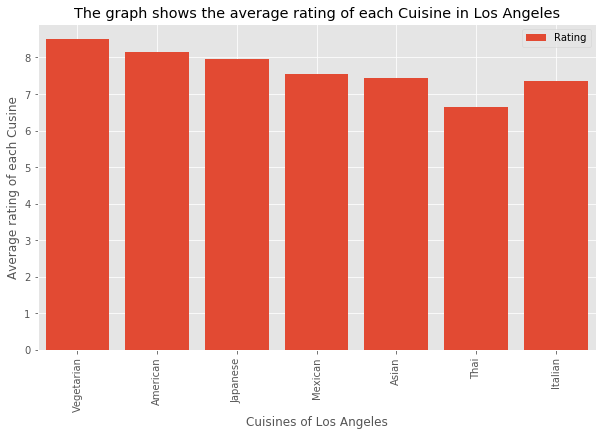

In [116]:
Cuisine_ranks.plot(kind='bar', figsize=(10, 6))

bars = Cuisine_ranks.Cuisine 
heights = Cusine_ranks.Rating
y_pos = range(len(bars))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)

plt.xlabel('Cuisines of Los Angeles')
plt.ylabel('Average rating of each Cusine')
plt.title('The graph shows the average rating of each Cuisine in Los Angeles')

plt.show()

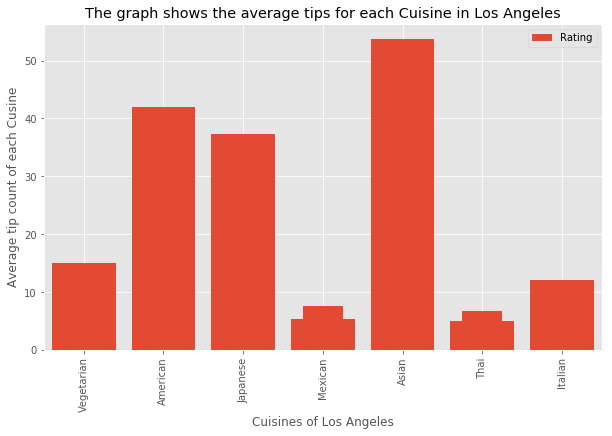

In [123]:
Cuisine_ranks.plot(kind='bar', figsize=(10, 6))

bars = Cuisine_tips.Cuisine 
heights = Cuisine_tips.Tips
y_pos = range(len(bars))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)

plt.xlabel('Cuisines of Los Angeles')
plt.ylabel('Average tip count of each Cusine')
plt.title('The graph shows the average tips for each Cuisine in Los Angeles')

plt.show()

In addition to this an area graph was generated to show the popularity of the cuisines in a respective Neighborhood in terms of highest frequencies. 

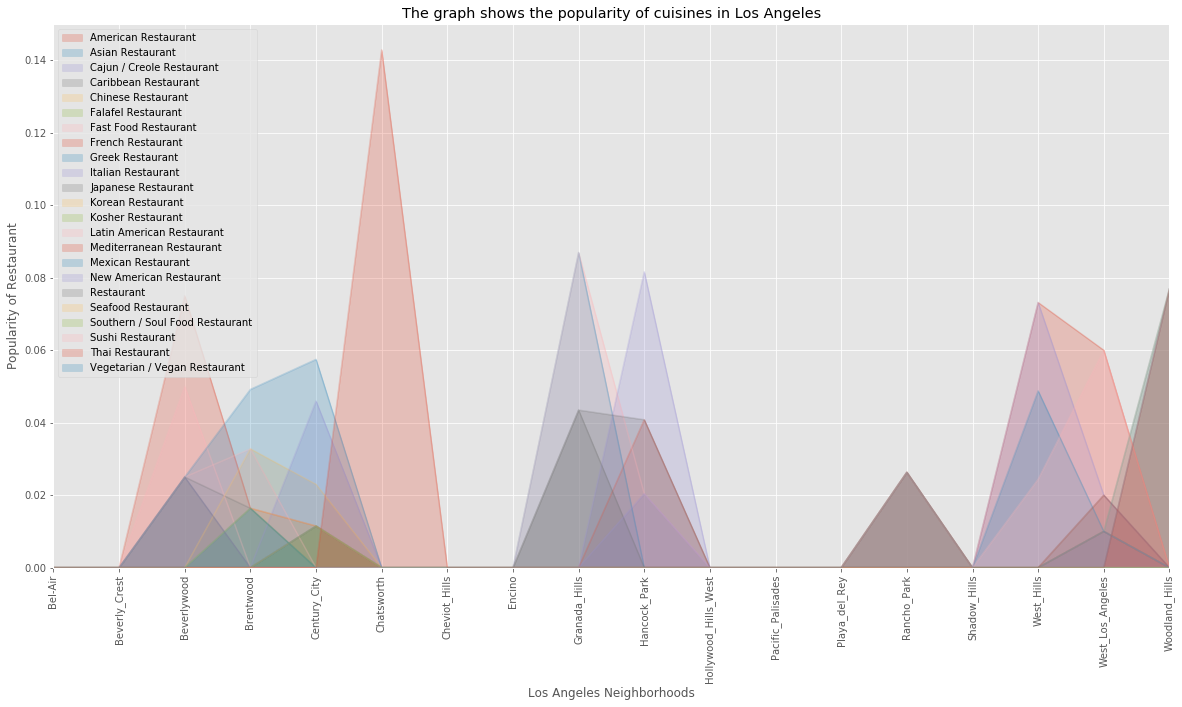

In [135]:
LA_grouped_R.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            ) 
bars = LA_grouped_R['Neighborhood']
y_pos = range(len(bars))
plt.xticks(y_pos, bars, rotation=90)
plt.xlabel('Los Angeles Neighborhoods')
plt.ylabel('Popularity of Restaurant')
plt.title('The graph shows the popularity of cuisines in Los Angeles')

plt.show()

### Trending Venues
In order to pull the trending data, a request was made Foursquare API for the current JSON file and then the venue information can be extracted. A trending values dataframe is created from the normalized JSON containing the venue and trending data. The trending data was then placed on the map of Los Angeles using a blue circle marker. There was also provision placed in the event of there being no trending data that this is fed back to the user.

In [26]:
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, #using co-ordinates for LA
            longitude, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()

In [27]:
results

{'meta': {'code': 200, 'requestId': '5edcf3586d8c56001b181915'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Civic Center',
  'headerFullLocation': 'Civic Center, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 186,
  'suggestedBounds': {'ne': {'lat': 34.06269090900001,
    'lng': -118.2319240389281},
   'sw': {'lat': 34.04469089099999, 'lng': -118.25360916107189}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fecf601067d351381ea64fa',
       'name': 'Grand Park',
       'location': {'address': '200 N Grand Ave',
        'crossStreet': 'btwn Temple & 1st St',
        'lat': 34.05503441823839,
        'ln

In [28]:
def get_category_type(row): #function created to obtain categories
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
if len(results["response"]['groups'][0]['items'][1]) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results["response"]['groups'][0]['items'][1]['venue']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [30]:
trending_venues_df

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Redbird,American Restaurant,357,Los Angeles,90012,CA,United States,34.050666,-118.244068


In [32]:
if len(results["response"]['groups'][0]['items'][1]) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [33]:
venues_map  #map generated showing trending restaurants

## Discussion
In terms of the observation of the results one of the biggest keys in the analysis is the clustering of the neighborhoods according to restaurant cuisine popularity. Cluster 1 shows that Vegetarian and Japanese are the most popular cuisines however the availability of these cuisines are limited as there weren’t as many hits from Foursquare API. So, although these cuisines are popular there are few places in which customers can access them which makes it ideal to open more restaurants of this type i.e. Vegetarian and Japanese. If you also look at the map for Cluster 1 these neighborhoods are also close together, with the exception of neighborhoods Playa del Rey and Shadow Hills, so that there is a larger consumer base for a new restaurant that is opened in any neighborhood in Cluster 1. 

Clusters 2, 3 and 4 have one neighborhood per cluster and thus any new restaurant located in these neighborhoods will have a smaller consumer base however they wouldn’t be competing with a lot of other venues.

Cluster 5 neighborhoods are popular with American and Italian type cuisines however these places are in abundance and are some of the most frequented places according to the data in terms of popularity. Any new restaurant located in a neighborhood in Cluster 5 will face a lot of competition no matter the cuisine.

Similarly, as per the cluster analysis the ratings analysis on the sample set shows that Vegetarian, American and Japanese cuisines have the highest ratings. This infers that customers have better preference for these cuisines. The data is slightly skewed for the Vegetarian cuisine however due to the limited number of venues.

In terms of tip count analysis Asian, American and Japanese have the highest counts. This is expected for American and Japanese but not for the Asian cuisine since it has limited hits in the clustering. This suggests that the tip count is generated for the Asian cuisine in one neighborhood in Cluster 4 and new Asian restaurant located in a Cluster 4 neighborhood wouldn’t have as large of a consumer base. The tip count data is slightly skewed for the Vegetarian cuisine however due to the limited number of venues.

Finally the trending data did not show much presumably due to current worldwide issues where people movement is limited and doesn’t give a clear indication on what is the current trending cuisine.
 


## Conclusion
In conclusion the data points to opening a Vegetarian or Japanese type restaurant in any of the following neighborhoods:
* Bel Air
* Beverley Crest
* Pacific Palisades
* Brentwood
* Cheviot Hills
* Hollywood Hills West
* Encino
* Rancho Park

The reasons being for this include:
* There are limited venues for both Vegetarian and Japanese cuisines meaning less competition amongst venues
* These places are located in close proximity to each other resulting in a larger consumer base
* Vegetarian and Japanese venues currently have good rating and good tip counts 
* Cluster 5 neighborhoods are not recommended due to the immense popularity and abundance of American cuisine
* Cluster 2, 3 and 4 is not recommended due to the lower consumer base as these have single neighborhoods in each
